### Install all the necessary liberaries

In [2]:
!pip install pandas-datareader
!pip install yfinance
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 23.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 1.4 MB/s eta 0:00:0000:01
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 22.6 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 45.3 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.1-cp310-cp310-macosx_10_9_x86_64.whl size=260239 sha256=739f02239d9074593a3bf4e3665ff010ecf903d2db56ca6bb744d681e96a2c12
  Stored in directory: /Users/Atharva/Library/Caches/pip/wheels/d7/35/5c/1374782be033462df5f40174d8d879519d64ed8c25a1977554
S

In [3]:
import pandas as pd
import pandas_datareader as web
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from pandas.plotting import scatter_matrix
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

#### write function for date & time

In [4]:
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2024,3,12)

#### Download the Data from yahoo finance using stock ticker name & display the prices

In [5]:
price_rsnl = yf.download('RELIANCE.NS',start,end)

[*********************100%%**********************]  1 of 1 completed


#### Display the last 5 row with prices [OHLC]

In [6]:
price_rsnl.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-04,2980.949951,3024.899902,2974.449951,3014.800049,3014.800049,5012210
2024-03-05,3011.550049,3014.800049,2972.100098,3000.399902,3000.399902,3553834
2024-03-06,2986.899902,3018.000000,2957.000000,3006.000000,3006.000000,3902838
2024-03-07,3005.949951,3006.199951,2951.100098,2957.850098,2957.850098,4157863
2024-03-11,2978.000000,2978.000000,2927.000000,2933.199951,2933.199951,5638565


#### Plot the close price of the stock

Text(0.5, 1.0, 'Closing price line graph of Reliance')

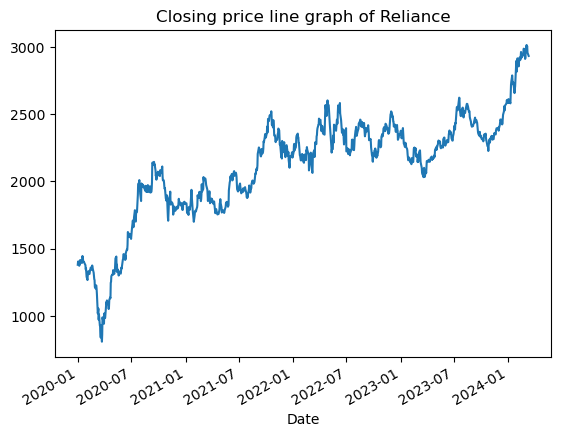

In [7]:
price_rsnl.Close.plot()
plt.title('Closing price line graph of Reliance')

#### Adjusted Data means corporate actions like stock splits, dividends, right offerings etc .....

In [8]:
price_rsnl.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-04,2980.949951,3024.899902,2974.449951,3014.800049,3014.800049,5012210
2024-03-05,3011.550049,3014.800049,2972.100098,3000.399902,3000.399902,3553834
2024-03-06,2986.899902,3018.000000,2957.000000,3006.000000,3006.000000,3902838
2024-03-07,3005.949951,3006.199951,2951.100098,2957.850098,2957.850098,4157863
2024-03-11,2978.000000,2978.000000,2927.000000,2933.199951,2933.199951,5638565


#### Inorder to temporary delete the Adjusted close price columns, add auto_adjust function to true & display last 5 rows

In [9]:
price_tcs = yf.download('TCS.NS',start,end,auto_adjust=True)
price_tcs.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2024-03-04,4105.000000,4117.899902,4075.899902,4080.699951,1749271
2024-03-05,4062.000000,4064.000000,3980.000000,4012.100098,2070859
2024-03-06,3994.050049,4072.000000,3958.449951,4064.300049,1744204
2024-03-07,4065.000000,4124.000000,4037.699951,4108.600098,2688905
2024-03-11,4089.000000,4153.000000,4089.000000,4122.350098,2304068


#### For multiple data we need to use list of ticker, pass the list to the download & fetch the values

In [10]:
tickers_list = ['TCS.NS','INFY.NS','HCLTECH.NS','HDFCBANK.NS']
price_list = yf.download(tickers_list,start,end,auto_adjust=True)
price_list.tail()

[*********************100%%**********************]  4 of 4 completed


Price             Close                                                High  \
Ticker       HCLTECH.NS  HDFCBANK.NS      INFY.NS       TCS.NS   HCLTECH.NS   
Date                                                                          
2024-03-04  1637.949951  1432.699951  1637.199951  4080.699951  1654.000000   
2024-03-05  1619.349976  1440.849976  1606.500000  4012.100098  1629.949951   
2024-03-06  1644.199951  1442.599976  1617.550049  4064.300049  1650.000000   
2024-03-07  1637.650024  1446.099976  1616.449951  4108.600098  1654.550049   
2024-03-11  1638.650024  1427.800049  1600.599976  4122.350098  1659.800049   

Price                                                      Low               \
Ticker      HDFCBANK.NS      INFY.NS       TCS.NS   HCLTECH.NS  HDFCBANK.NS   
Date                                                                          
2024-03-04  1437.000000  1664.449951  4117.899902  1635.000000  1424.300049   
2024-03-05  1443.000000  1637.349976  4064.000000  1607.050049  1421.650024   
2024-03-06  1452.849976  1620.150024  4072.000000  1603.849976  1433.550049   
2024-03-07  1451.050049  1628.449951  4124.000000  1630.099976  1441.400024   
2024-03-11  1445.949951  1613.800049  4153.000000  1632.050049  1423.000000   

Price                                      Open                            \
Ticker          INFY.NS       TCS.NS HCLTECH.NS  HDFCBANK.NS      INFY.NS   
Date                                                                        
2024-03-04  1633.650024  4075.899902     1649.0  1430.949951  1657.849976   
2024-03-05  1602.000000  3980.000000     1624.0  1422.000000  1634.000000   
2024-03-06  1576.000000  3958.449951     1613.0  1433.550049  1602.800049   
2024-03-07  1604.199951  4037.699951     1650.0  1445.500000  1616.599976   
2024-03-11  1588.000000  4089.000000     1655.0  1430.000000  1608.150024   

Price                       Volume                                
Ticker           TCS.NS HCLTECH.NS HDFCBANK.NS  INFY.NS   TCS.NS  
Date                                                              
2024-03-04  4105.000000    1788071    17808237  4445156  1749271  
2024-03-05  4062.000000    3339546    18995836  4596579  2070859  
2024-03-06  3994.050049    2366177    21204765  6420684  1744204  
2024-03-07  4065.000000    3181239    24674023  6348359  2688905  
2024-03-11  4089.000000    2970902    25265547  6752895  2304068

#### Fetching minute level data, mention the time period and intervals

In [11]:
price_tcs = yf.download('TCS.NS',period="5d",interval="1m",auto_adjust=True)
price_tcs.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Datetime,,,,,
2024-03-12 15:25:00+05:30,4192.700195,4195.000000,4192.700195,4195.000000,13947
2024-03-12 15:26:00+05:30,4195.000000,4196.000000,4193.049805,4195.600098,9015
2024-03-12 15:27:00+05:30,4195.950195,4196.000000,4193.549805,4195.450195,6209
2024-03-12 15:28:00+05:30,4193.049805,4195.299805,4192.500000,4194.000000,5661
2024-03-12 15:29:00+05:30,4194.000000,4195.000000,4192.000000,4195.000000,6175


### Fetching fundamental data

In [12]:
price_tcs = yf.Ticker("TCS.NS")
price_tcs.info

{'address1': 'TCS House',
 'address2': 'Raveline Street Fort',
 'city': 'Mumbai',
 'zip': '400001',
 'country': 'India',
 'phone': '91 22 6778 9595',
 'website': 'https://www.tcs.com',
 'industry': 'Information Technology Services',
 'industryKey': 'information-technology-services',
 'industryDisp': 'Information Technology Services',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Tata Consultancy Services Limited provides information technology (IT) and IT enabled services worldwide. It operates through Banking, Financial Services and Insurance; Manufacturing; Retail and Consumer Business; Communication, Media and Technology; Life Sciences and Healthcare; and Others segments. The company provides TCS ADD, a suite of technology platforms for clinical research and drug development; TCS BaNCS, a financial solution platform; TCS BFSI Platforms, a cloud-native, as-a-service that helps FIs and insurance firms; TCS CHROMA, a cloud-ba

#### To obtain balance sheet

In [13]:
price_tcs.balance_sheet

,2023-03-31,2022-03-31,2021-03-31,2020-03-31
Treasury Shares Number,NaN,0.0,0.0,NaN
Ordinary Shares Number,3659051373.0,3659051373.0,3699051373.0,3752384706.0
Share Issued,3659051373.0,3659051373.0,3699051373.0,3752384706.0
Total Debt,76880000000.0,78180000000.0,77950000000.0,81760000000.0
Tangible Book Value,876030000000.0,861180000000.0,841550000000.0,821330000000.0
...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,471980000000.0,483010000000.0,383960000000.0,357210000000.0
Other Short Term Investments,400830000000.0,358450000000.0,315380000000.0,270790000000.0
Cash And Cash Equivalents,71150000000.0,124560000000.0,68580000000.0,86420000000.0
Cash Equivalents,49990000000.0,102770000000.0,15860000000.0,4050000000.0


#### To fetch data for various keys .....

In [14]:
pb = price_tcs.info['priceToBook']

print('Price to Book ratio is: %.2f' % pb)

Price to Book ratio is: 16.82


In [15]:
pe = price_tcs.info['totalRevenue']
print('Price to Earnings ratio is: %.2f' % pe)

Price to Earnings ratio is: 2388180074496.00


#### Displaying only open price of all the stocks

Text(0.5, 1.0, 'Stock prices of TCS,Infosys,HCL Tech,HDFC Bank, ')

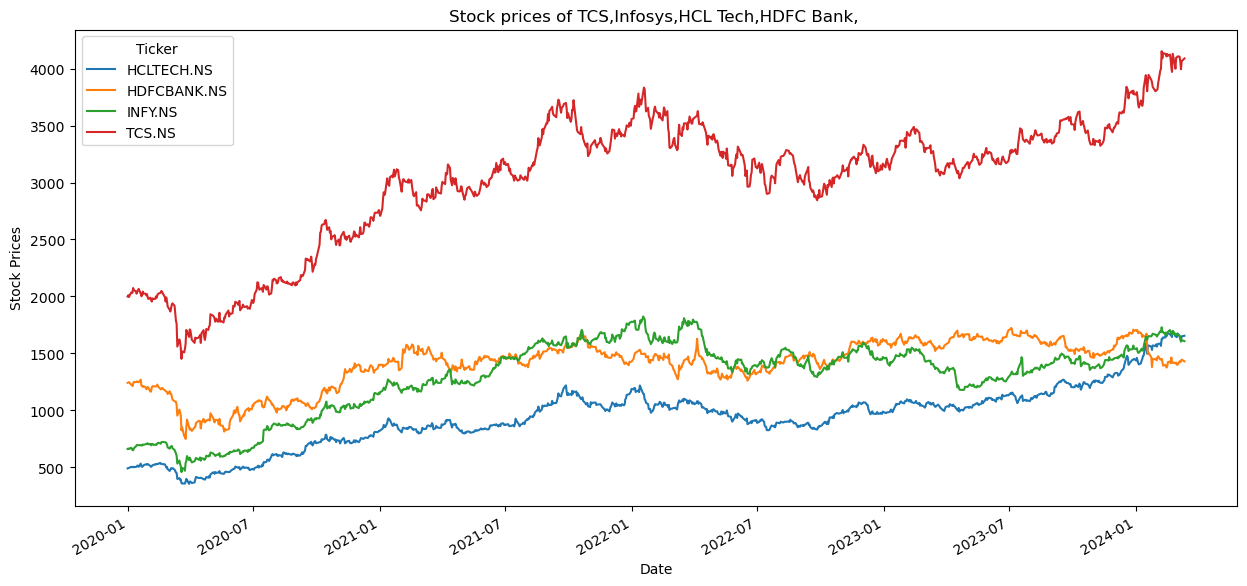

In [16]:
price_list['Open'].plot(figsize=(15,7))
plt.ylabel('Stock Prices')
plt.title('Stock prices of TCS,Infosys,HCL Tech,HDFC Bank, ')

#### Volumes of each stocks

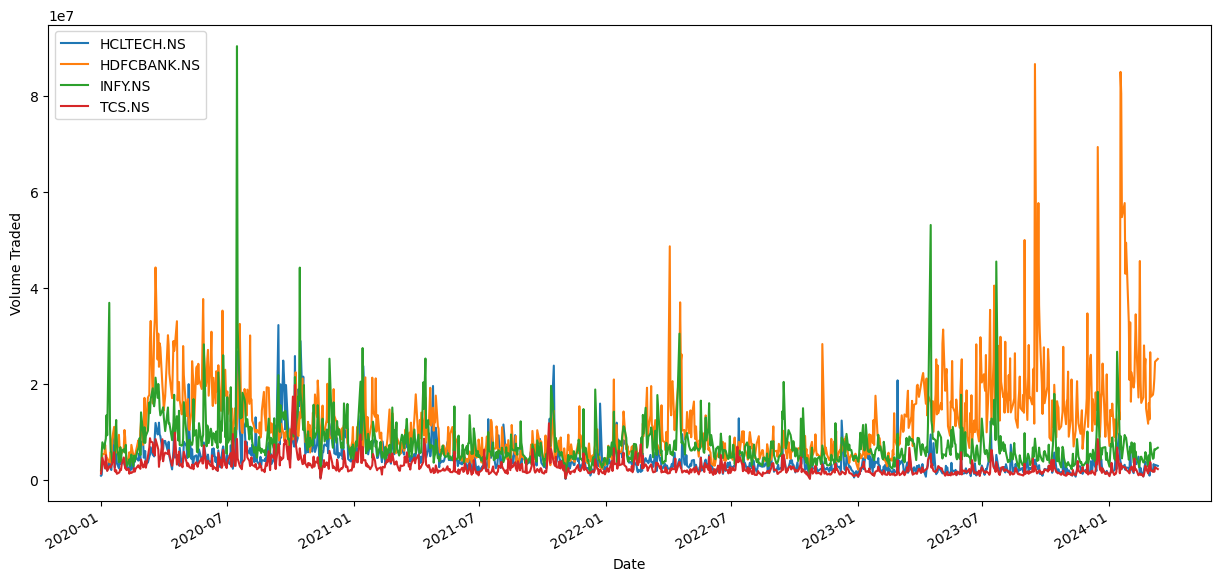

In [17]:
price_list['Volume'].plot(figsize=(15,7))
plt.ylabel('Volume Traded')
plt.legend()

In [20]:
price_HDFCB = yf.download('HDFCBANK.NS',start,end,auto_adjust=True)

[*********************100%%**********************]  1 of 1 completed


In [21]:
price_HDFCB.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-01,1241.757100,1245.552166,1236.405118,1244.189819,1836849
2020-01-02,1244.579054,1253.336843,1244.579054,1252.120483,3068583
2020-01-03,1247.692819,1250.417512,1229.593414,1234.264282,5427775
2020-01-06,1226.090220,1227.841825,1202.736121,1207.552856,5445093
2020-01-07,1225.019871,1237.232048,1218.548815,1226.674072,7362247


#### Locating the spike in the volume of HDFC Bank

In [22]:
price_HDFCB.iloc[[price_HDFCB['Volume'].argmax()]]

,Open,High,Low,Close,Volume
Date,,,,,
2023-09-15,1650.0,1670.0,1650.0,1661.75,86705601


#### Plotting the strike price range with volume, for indepth insights

<AxesSubplot:xlabel='Date'>

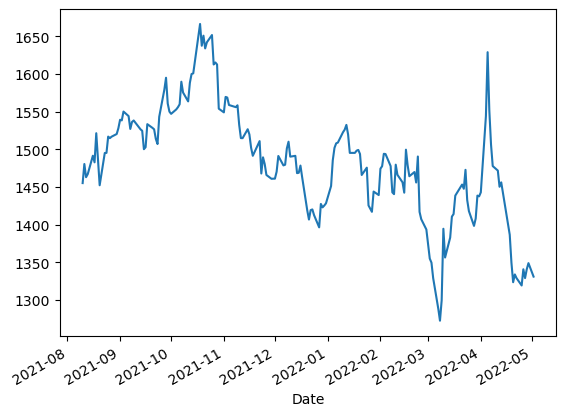

In [23]:
price_HDFCB.iloc[400:580]['Open'].plot()

In [24]:
price_list['Volume']

Ticker,HCLTECH.NS,HDFCBANK.NS,INFY.NS,TCS.NS
Date,,,,
2020-01-01,918373,1836849,2112415,1354908
2020-01-02,1075642,3068583,5658200,2380752
2020-01-03,3269446,5427775,7882938,4655761
2020-01-06,3589985,5445093,6519403,3023209
2020-01-07,3179728,7362247,7899363,2429317
...,...,...,...,...
2024-03-04,1788071,17808237,4445156,1749271
2024-03-05,3339546,18995836,4596579,2070859
2024-03-06,2366177,21204765,6420684,1744204


### Total Traded Capital

In [25]:
price_tcs = yf.download('TCS.NS',start,end,auto_adjust=True)
price_tcs.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2024-03-04,4105.000000,4117.899902,4075.899902,4080.699951,1749271
2024-03-05,4062.000000,4064.000000,3980.000000,4012.100098,2070859
2024-03-06,3994.050049,4072.000000,3958.449951,4064.300049,1744204
2024-03-07,4065.000000,4124.000000,4037.699951,4108.600098,2688905
2024-03-11,4089.000000,4153.000000,4089.000000,4122.350098,2304068


In [26]:
price_HDFCBank = yf.download('HDFCBANK.NS',start,end,auto_adjust=True)
price_HDFCBank.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2024-03-04,1430.949951,1437.000000,1424.300049,1432.699951,17808237
2024-03-05,1422.000000,1443.000000,1421.650024,1440.849976,18995836
2024-03-06,1433.550049,1452.849976,1433.550049,1442.599976,21204765
2024-03-07,1445.500000,1451.050049,1441.400024,1446.099976,24674023
2024-03-11,1430.000000,1445.949951,1423.000000,1427.800049,25265547


In [27]:
price_infy = yf.download('INFY.NS',start,end,auto_adjust=True)
price_infy.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2024-03-04,1657.849976,1664.449951,1633.650024,1637.199951,4445156
2024-03-05,1634.000000,1637.349976,1602.000000,1606.500000,4596579
2024-03-06,1602.800049,1620.150024,1576.000000,1617.550049,6420684
2024-03-07,1616.599976,1628.449951,1604.199951,1616.449951,6348359
2024-03-11,1608.150024,1613.800049,1588.000000,1600.599976,6752895


In [28]:
price_hcltech = yf.download('HCLTECH.NS',start,end,auto_adjust=True)
price_hcltech.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2024-03-04,1649.0,1654.000000,1635.000000,1637.949951,1788071
2024-03-05,1624.0,1629.949951,1607.050049,1619.349976,3339546
2024-03-06,1613.0,1650.000000,1603.849976,1644.199951,2366177
2024-03-07,1650.0,1654.550049,1630.099976,1637.650024,3181239
2024-03-11,1655.0,1659.800049,1632.050049,1638.650024,2970902


#### To find the total capital traded in the market

In [29]:
price_hcltech['Total Capital Traded'] = price_hcltech['Open'] * price_hcltech['Volume']
price_tcs['Total Capital Traded'] = price_tcs['Open'] * price_tcs['Volume']
price_infy['Total Capital Traded'] = price_infy['Open'] * price_infy['Volume']
price_HDFCBank['Total Capital Traded'] = price_HDFCBank['Open'] * price_HDFCBank['Volume']

In [30]:
price_tcs.head()

,Open,High,Low,Close,Volume,Total Capital Traded
Date,,,,,,
2020-01-01,1999.687704,2014.353220,1986.774591,1999.318848,1354908,2.709393e+09
2020-01-02,2010.709778,2010.709778,1982.347051,1990.140991,2380752,4.787001e+09
2020-01-03,1995.997902,2050.417438,1995.997902,2029.802490,4655761,9.292889e+09
2020-01-06,2033.815092,2053.138597,2018.042559,2029.618286,3023209,6.148648e+09
2020-01-07,2029.664500,2042.715876,2014.261047,2034.599243,2429317,4.930698e+09


In [31]:
price_tcs.tail()

,Open,High,Low,Close,Volume,Total Capital Traded
Date,,,,,,
2024-03-04,4105.000000,4117.899902,4075.899902,4080.699951,1749271,7.180757e+09
2024-03-05,4062.000000,4064.000000,3980.000000,4012.100098,2070859,8.411829e+09
2024-03-06,3994.050049,4072.000000,3958.449951,4064.300049,1744204,6.966438e+09
2024-03-07,4065.000000,4124.000000,4037.699951,4108.600098,2688905,1.093040e+10
2024-03-11,4089.000000,4153.000000,4089.000000,4122.350098,2304068,9.421334e+09


In [32]:
price_hcltech.head()

,Open,High,Low,Close,Volume,Total Capital Traded
Date,,,,,,
2020-01-01,490.914780,493.932345,488.716226,493.113281,918373,4.508429e+08
2020-01-02,493.630575,495.742882,491.863155,494.492737,1075642,5.309698e+08
2020-01-03,494.880718,507.382061,493.889212,504.407593,3269446,1.617986e+09
2020-01-06,504.364469,510.572042,499.579483,501.777985,3589985,1.810661e+09
2020-01-07,501.777971,506.735400,499.234584,503.717834,3179728,1.595517e+09


In [33]:
price_infy.head()

,Open,High,Low,Close,Volume,Total Capital Traded
Date,,,,,,
2020-01-01,661.909431,666.412216,659.703055,663.575439,2112415,1.398227e+09
2020-01-02,665.421694,667.132720,658.217237,661.639343,5658200,3.765089e+09
2020-01-03,660.918834,673.616666,660.918834,671.815552,7882938,5.209982e+09
2020-01-06,671.905626,678.839926,663.260300,665.376587,6519403,4.380424e+09
2020-01-07,664.610983,668.753523,652.993778,655.515381,7899363,5.250003e+09


In [34]:
price_HDFCBank.head()

,Open,High,Low,Close,Volume,Total Capital Traded
Date,,,,,,
2020-01-01,1241.757100,1245.552166,1236.405118,1244.189819,1836849,2.280920e+09
2020-01-02,1244.579054,1253.336843,1244.579054,1252.120483,3068583,3.819094e+09
2020-01-03,1247.692819,1250.417512,1229.593414,1234.264282,5427775,6.772196e+09
2020-01-06,1226.090220,1227.841825,1202.736121,1207.552856,5445093,6.676175e+09
2020-01-07,1225.019871,1237.232048,1218.548815,1226.674072,7362247,9.018899e+09


#### Volume chart of total capital traded 

Text(0, 0.5, 'Total Traded')

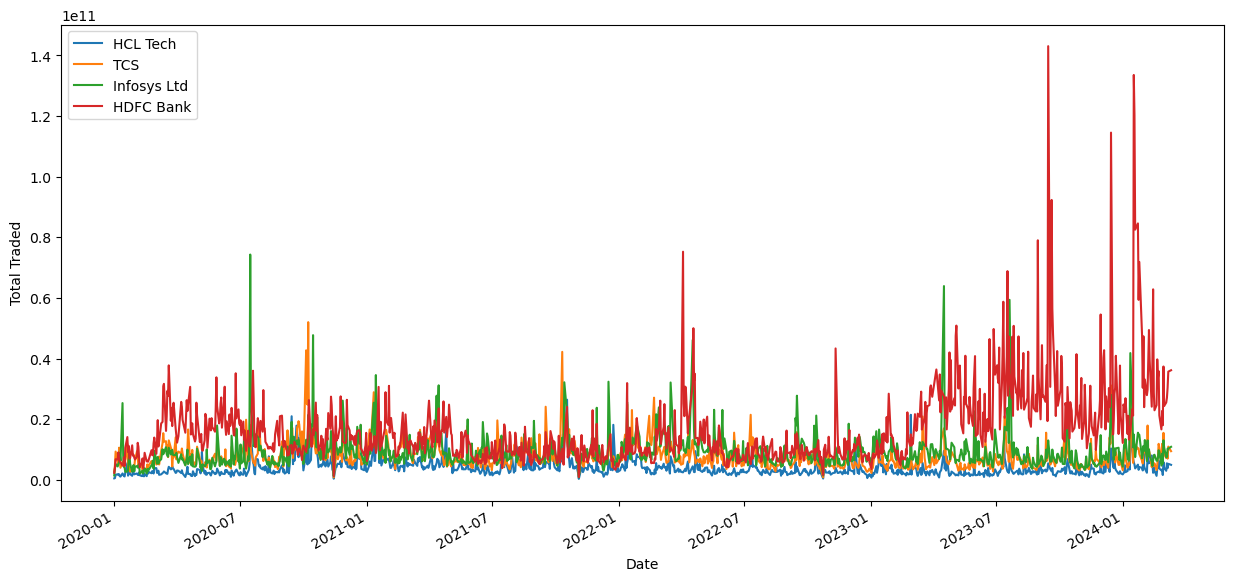

In [35]:
price_hcltech['Total Capital Traded'].plot(label='HCL Tech',figsize=(15,7))
price_tcs['Total Capital Traded'].plot(label='TCS')
price_infy['Total Capital Traded'].plot(label='Infosys Ltd')
price_HDFCBank['Total Capital Traded'].plot(label='HDFC Bank')
plt.legend()
plt.ylabel('Total Traded')

#### Max spiked value

In [36]:
price_tcs['Total Capital Traded'].argmax()

192

In [37]:
price_tcs.iloc[[price_tcs['Total Capital Traded'].argmax()]]

,Open,High,Low,Close,Volume,Total Capital Traded
Date,,,,,,
2020-10-08,2620.929981,2700.493927,2620.929981,2644.986328,19839329,5.199749e+10


#### Graph plotted for Total Captial Traded

<AxesSubplot:xlabel='Date'>

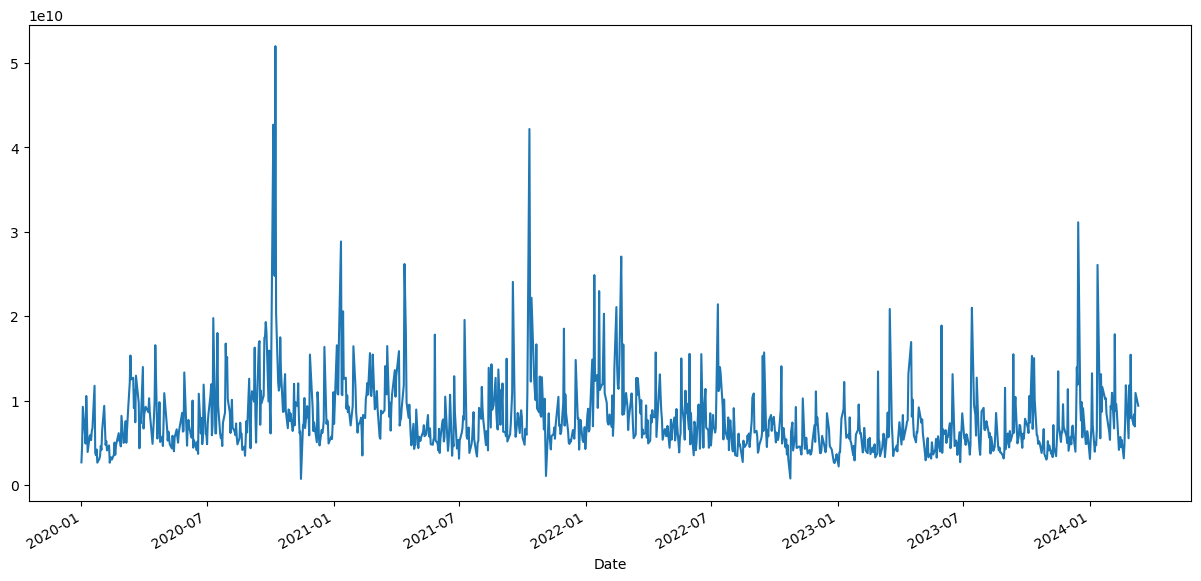

In [38]:
price_tcs['Total Capital Traded'].plot(figsize=(15,7))

#### Graph plotted for Total Captial Traded in-depth

<AxesSubplot:xlabel='Date'>

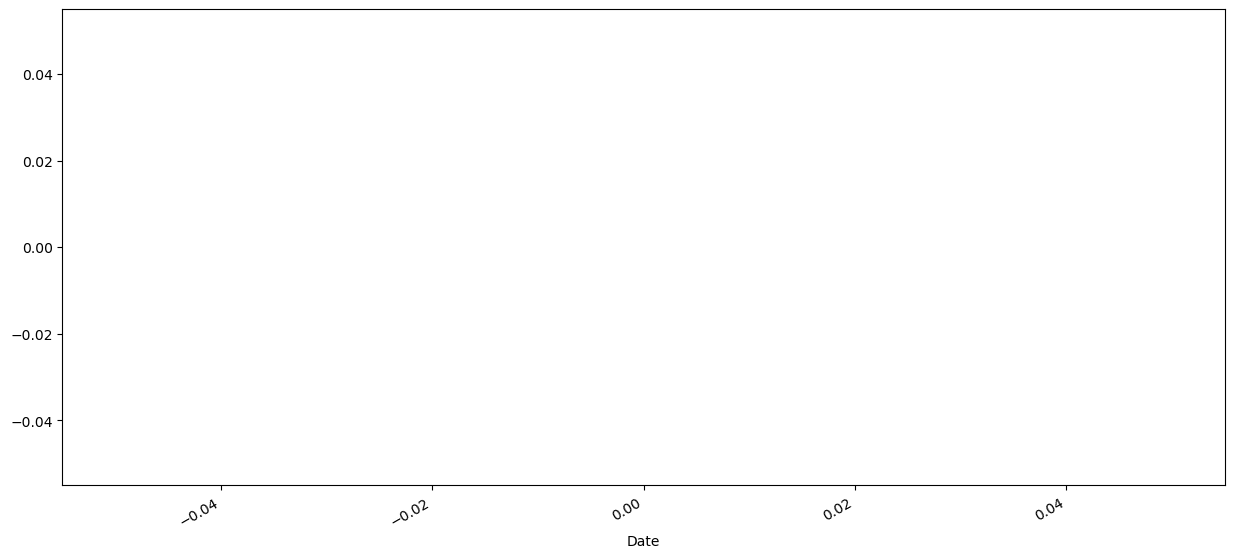

In [39]:
price_tcs.iloc[1100:1300]['Total Capital Traded'].plot(figsize=(15,7))

#### Plotting moving average of HCL Tech stock

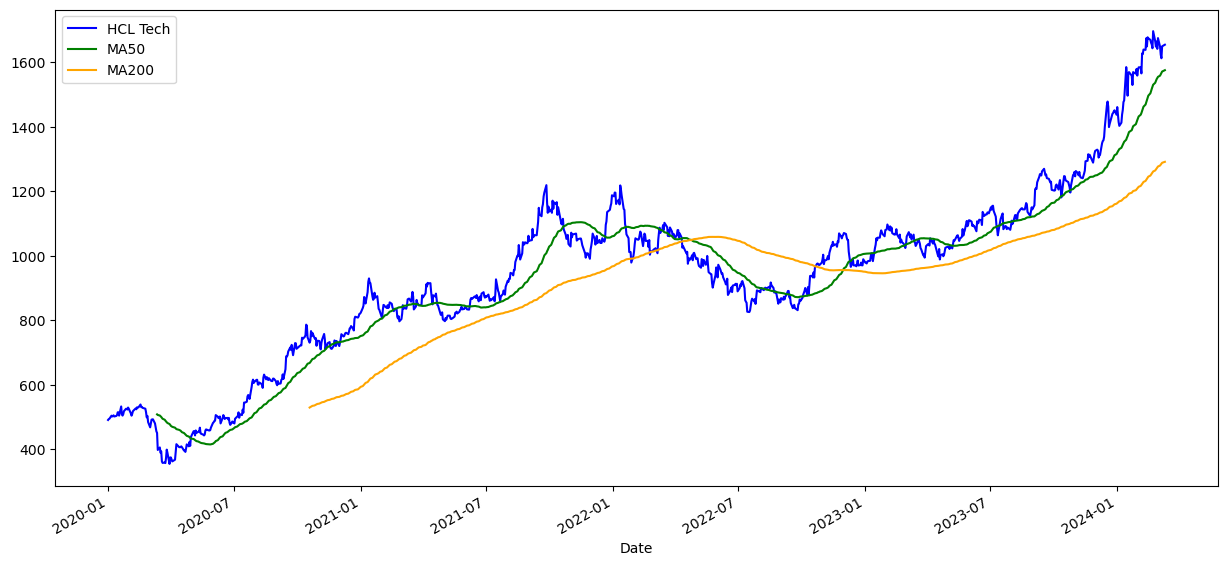

In [40]:
price_hcltech['Open'].plot(label='HCL Tech',figsize=(15,7),color='Blue')
price_hcltech['MA50'] = price_hcltech['Open'].rolling(50).mean()
price_hcltech['MA50'].plot(label='MA50',color='Green')
price_hcltech['MA200'] = price_hcltech['Open'].rolling(200).mean()
price_hcltech['MA200'].plot(label='MA200',color='Orange')
plt.legend()

#### Plotting moving average of TCS stock

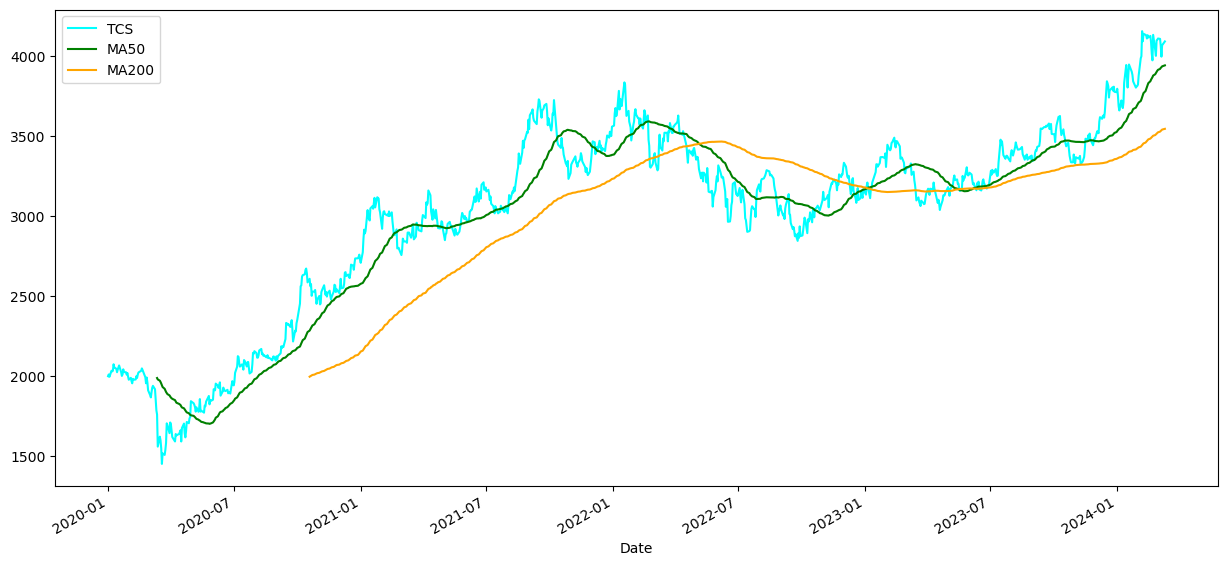

In [41]:
price_tcs['Open'].plot(label='TCS',figsize=(15,7),color='Cyan')
price_tcs['MA50'] = price_tcs['Open'].rolling(50).mean()
price_tcs['MA50'].plot(label='MA50',color='Green')
price_tcs['MA200'] = price_tcs['Open'].rolling(200).mean()
price_tcs['MA200'].plot(label='MA200',color='Orange')
plt.legend()

### Correlation & Scatter Matrix between stocks

In [42]:
stock_list = pd.concat([price_hcltech['Open'],price_tcs['Open'],price_infy['Open'],price_HDFCBank['Open']],axis=1)
stock_list.columns = ['HCL Tech','TCS','Infosys','HDFC Bank']

array([[<AxesSubplot:xlabel='HCL Tech', ylabel='HCL Tech'>,
        <AxesSubplot:xlabel='TCS', ylabel='HCL Tech'>,
        <AxesSubplot:xlabel='Infosys', ylabel='HCL Tech'>,
        <AxesSubplot:xlabel='HDFC Bank', ylabel='HCL Tech'>],
       [<AxesSubplot:xlabel='HCL Tech', ylabel='TCS'>,
        <AxesSubplot:xlabel='TCS', ylabel='TCS'>,
        <AxesSubplot:xlabel='Infosys', ylabel='TCS'>,
        <AxesSubplot:xlabel='HDFC Bank', ylabel='TCS'>],
       [<AxesSubplot:xlabel='HCL Tech', ylabel='Infosys'>,
        <AxesSubplot:xlabel='TCS', ylabel='Infosys'>,
        <AxesSubplot:xlabel='Infosys', ylabel='Infosys'>,
        <AxesSubplot:xlabel='HDFC Bank', ylabel='Infosys'>],
       [<AxesSubplot:xlabel='HCL Tech', ylabel='HDFC Bank'>,
        <AxesSubplot:xlabel='TCS', ylabel='HDFC Bank'>,
        <AxesSubplot:xlabel='Infosys', ylabel='HDFC Bank'>,
        <AxesSubplot:xlabel='HDFC Bank', ylabel='HDFC Bank'>]],
      dtype=object)

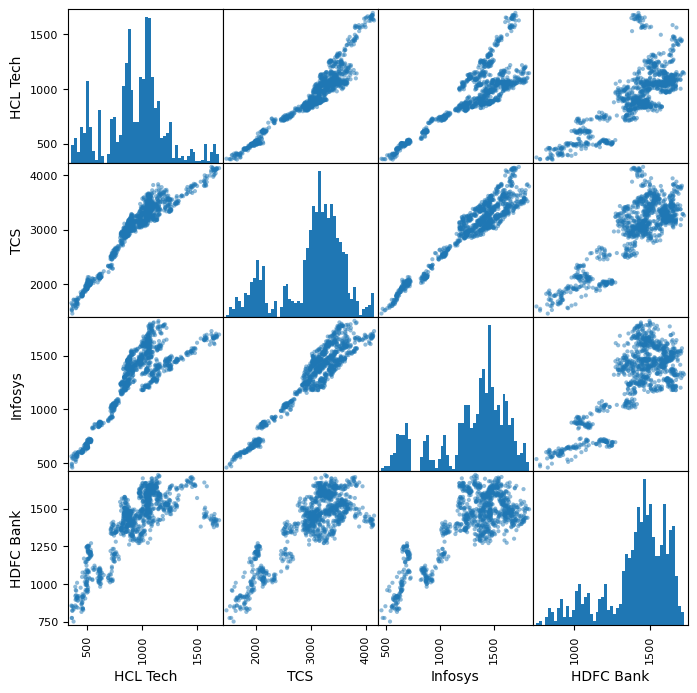

In [43]:
scatter_matrix(stock_list,figsize=(8,8),hist_kwds={'bins': 50})

#### Ploting candle stick patterns, install necessary candle sticks liberaries
#### Use the below two liberaries
#####  from mplfinance.original_flavor import candlestick_ohlc
#####  from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, DAYNAME

([<matplotlib.lines.Line2D at 0x7fbd123c3b80>,
  <matplotlib.patches.Rectangle at 0x7fbd31636350>])

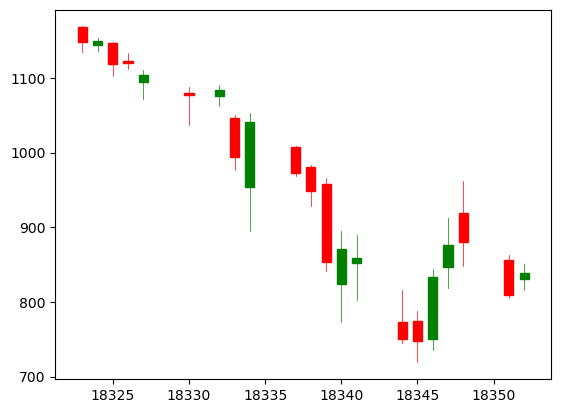

In [44]:
HDFCBank_reset = price_HDFCBank.loc['2020-03':'2020-03'].reset_index()
HDFCBank_reset['date_ax'] = HDFCBank_reset['Date'].apply(lambda date: date2num(date))
HDFCBank_values = [tuple(vals) for vals in HDFCBank_reset[['date_ax','Open','High','Low','Close']].values]

mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

fig, ax = plt.subplots()
candlestick_ohlc(ax,HDFCBank_values,width=0.6,colorup='g',colordown='r')

#### Daily Percentage Change or Volatile Market 
####                                rt = [pt/pt-1]-1

In [45]:
price_hcltech['Returns'] = (price_hcltech['Close']/price_hcltech['Close'].shift(1)) - 1
price_tcs['Returns'] = (price_tcs['Close']/price_tcs['Close'].shift(1)) - 1
price_infy['Returns'] = (price_infy['Close']/price_infy['Close'].shift(1)) - 1
price_HDFCBank['Returns'] = (price_HDFCBank['Close']/price_HDFCBank['Close'].shift(1)) - 1

In [46]:
price_hcltech.tail()

,Open,High,Low,Close,Volume,Total Capital Traded,MA50,MA200,Returns
Date,,,,,,,,,
2024-03-04,1649.0,1654.000000,1635.000000,1637.949951,1788071,2.948529e+09,1559.010658,1280.113659,-0.003741
2024-03-05,1624.0,1629.949951,1607.050049,1619.349976,3339546,5.423423e+09,1563.500018,1282.913534,-0.011356
2024-03-06,1613.0,1650.000000,1603.849976,1644.199951,2366177,3.816644e+09,1567.575377,1285.705313,0.015346
2024-03-07,1650.0,1654.550049,1630.099976,1637.650024,3181239,5.249044e+09,1571.766378,1288.723437,-0.003984
2024-03-11,1655.0,1659.800049,1632.050049,1638.650024,2970902,4.916843e+09,1576.003217,1291.734405,0.000611


In [47]:
price_tcs.tail()

,Open,High,Low,Close,Volume,Total Capital Traded,MA50,MA200,Returns
Date,,,,,,,,,
2024-03-04,4105.000000,4117.899902,4075.899902,4080.699951,1749271,7.180757e+09,3917.513701,3526.041934,-0.003334
2024-03-05,4062.000000,4064.000000,3980.000000,4012.100098,2070859,8.411829e+09,3923.975203,3530.348793,-0.016811
2024-03-06,3994.050049,4072.000000,3958.449951,4064.300049,1744204,6.966438e+09,3928.206739,3534.317131,0.013011
2024-03-07,4065.000000,4124.000000,4037.699951,4108.600098,2688905,1.093040e+10,3933.462105,3538.787659,0.010900
2024-03-11,4089.000000,4153.000000,4089.000000,4122.350098,2304068,9.421334e+09,3939.612552,3543.456576,0.003347


In [48]:
price_infy.tail()

,Open,High,Low,Close,Volume,Total Capital Traded,Returns
Date,,,,,,,
2024-03-04,1657.849976,1664.449951,1633.650024,1637.199951,4445156,7.369402e+09,-0.010576
2024-03-05,1634.000000,1637.349976,1602.000000,1606.500000,4596579,7.510810e+09,-0.018751
2024-03-06,1602.800049,1620.150024,1576.000000,1617.550049,6420684,1.029107e+10,0.006878
2024-03-07,1616.599976,1628.449951,1604.199951,1616.449951,6348359,1.026276e+10,-0.000680
2024-03-11,1608.150024,1613.800049,1588.000000,1600.599976,6752895,1.085967e+10,-0.009805


In [49]:
price_HDFCBank.tail()

,Open,High,Low,Close,Volume,Total Capital Traded,Returns
Date,,,,,,,
2024-03-04,1430.949951,1437.000000,1424.300049,1432.699951,17808237,2.548270e+10,0.001363
2024-03-05,1422.000000,1443.000000,1421.650024,1440.849976,18995836,2.701208e+10,0.005689
2024-03-06,1433.550049,1452.849976,1433.550049,1442.599976,21204765,3.039809e+10,0.001215
2024-03-07,1445.500000,1451.050049,1441.400024,1446.099976,24674023,3.566630e+10,0.002426
2024-03-11,1430.000000,1445.949951,1423.000000,1427.800049,25265547,3.612973e+10,-0.012655


#### Plotting the histogram with volatile values
#### Higher the values higher the volatile and not good for investment for now

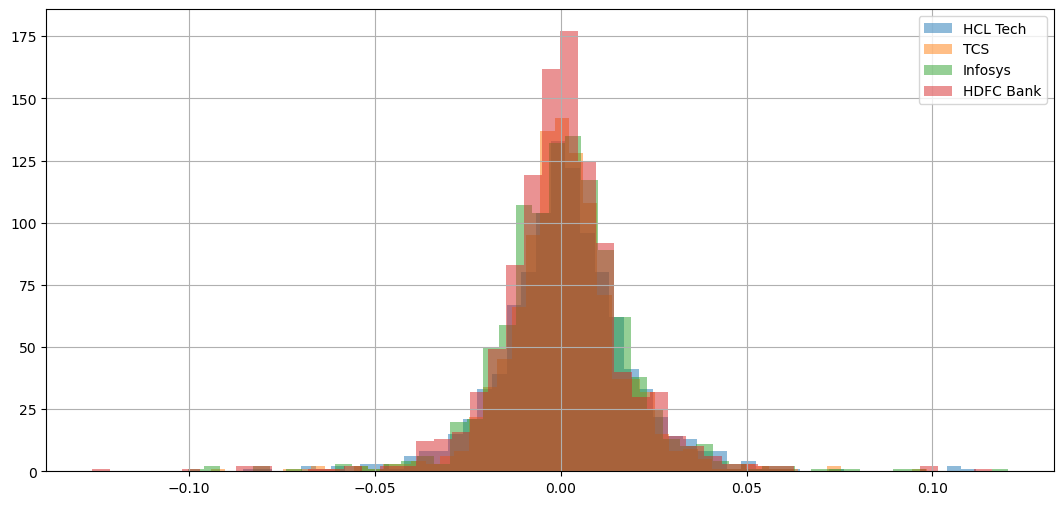

In [50]:
price_hcltech['Returns'].hist(bins=50,label='HCL Tech',alpha=0.5,figsize=(13,6))
price_tcs['Returns'].hist(bins=50,label='TCS',alpha=0.5)
price_infy['Returns'].hist(bins=50,label='Infosys',alpha=0.5)
price_HDFCBank['Returns'].hist(bins=50,label='HDFC Bank',alpha=0.5)
plt.legend()

#### Plotting KDE[Kernal Density Estimate] of the stocks for validating the volatile changes

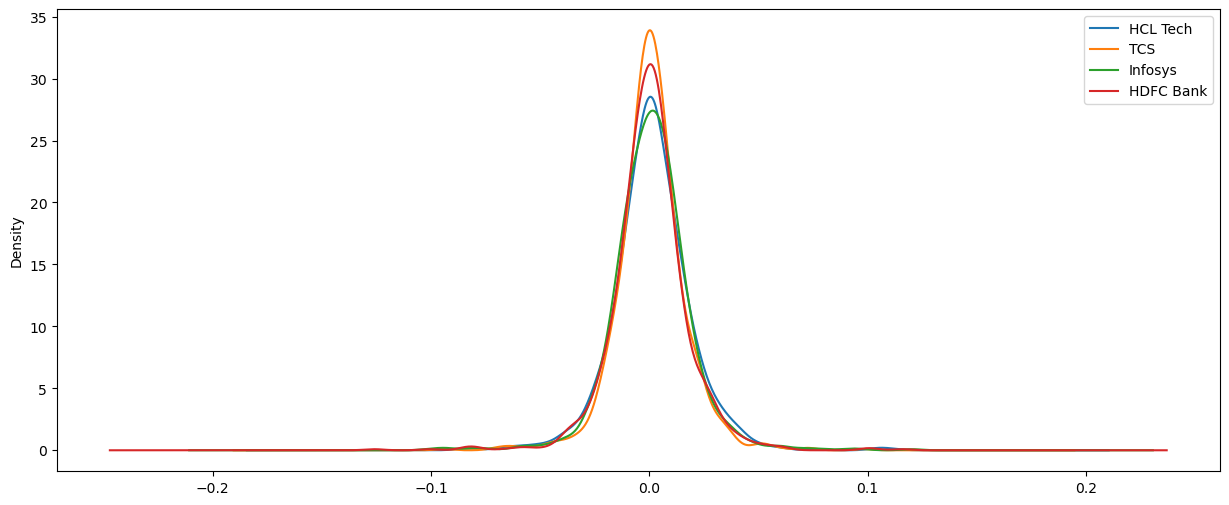

In [51]:
price_hcltech['Returns'].plot(kind='kde',label='HCL Tech',figsize=(15,6))
price_tcs['Returns'].plot(kind='kde',label='TCS')
price_infy['Returns'].plot(kind='kde',label='Infosys')
price_HDFCBank['Returns'].plot(kind='kde',label='HDFC Bank')
plt.legend()

#### Box plot for validating the volatile changes of stocks

<AxesSubplot:>

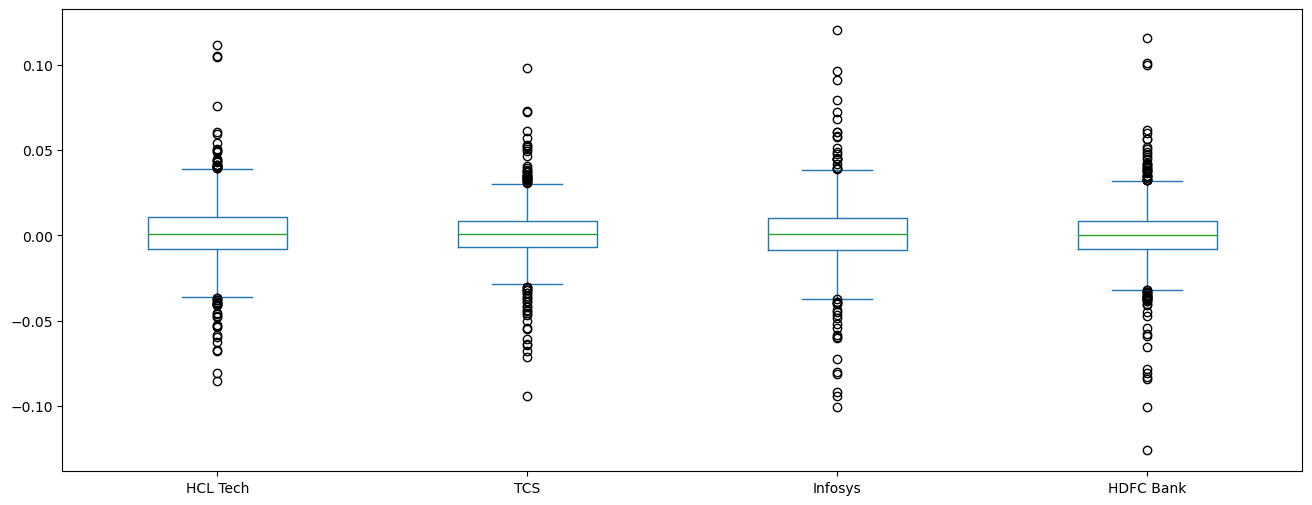

In [52]:
box_df = pd.concat([price_hcltech['Returns'],price_tcs['Returns'],price_infy['Returns'],price_HDFCBank['Returns']], axis=1)
box_df.columns = ['HCL Tech','TCS','Infosys','HDFC Bank']
box_df.plot(kind='box',figsize=(16,6))

### Compare the volatility of other stocks, create a scatter plot matrix

array([[<AxesSubplot:xlabel='HCL Tech', ylabel='HCL Tech'>,
        <AxesSubplot:xlabel='TCS', ylabel='HCL Tech'>,
        <AxesSubplot:xlabel='Infosys', ylabel='HCL Tech'>,
        <AxesSubplot:xlabel='HDFC Bank', ylabel='HCL Tech'>],
       [<AxesSubplot:xlabel='HCL Tech', ylabel='TCS'>,
        <AxesSubplot:xlabel='TCS', ylabel='TCS'>,
        <AxesSubplot:xlabel='Infosys', ylabel='TCS'>,
        <AxesSubplot:xlabel='HDFC Bank', ylabel='TCS'>],
       [<AxesSubplot:xlabel='HCL Tech', ylabel='Infosys'>,
        <AxesSubplot:xlabel='TCS', ylabel='Infosys'>,
        <AxesSubplot:xlabel='Infosys', ylabel='Infosys'>,
        <AxesSubplot:xlabel='HDFC Bank', ylabel='Infosys'>],
       [<AxesSubplot:xlabel='HCL Tech', ylabel='HDFC Bank'>,
        <AxesSubplot:xlabel='TCS', ylabel='HDFC Bank'>,
        <AxesSubplot:xlabel='Infosys', ylabel='HDFC Bank'>,
        <AxesSubplot:xlabel='HDFC Bank', ylabel='HDFC Bank'>]],
      dtype=object)

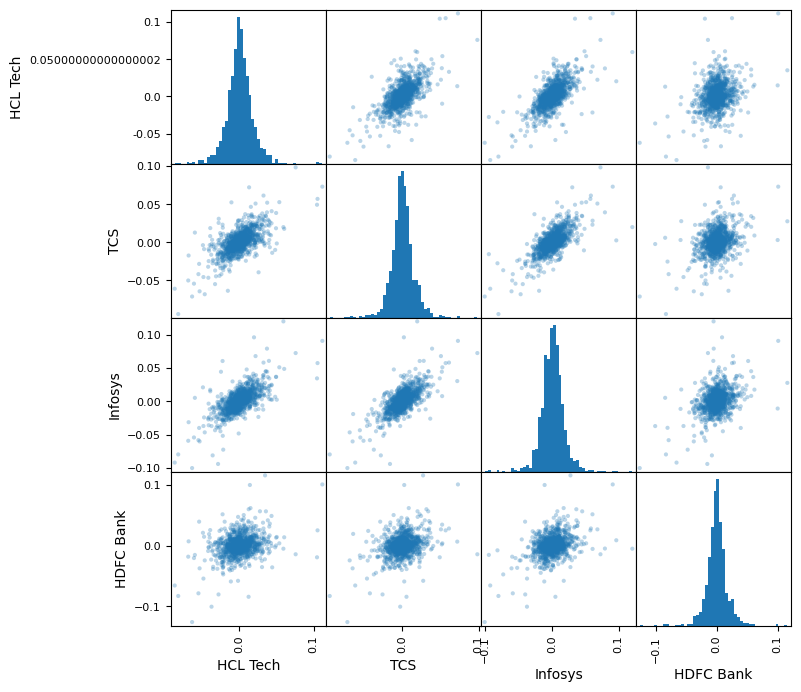

In [53]:
scatter_matrix(box_df,figsize=(8,8),hist_kwds={'bins':50},alpha=0.3)

### Cumulative Returns
#### it=(1+rt)it-1 = (1+ [pt/pt-1]-1)it-1 = [pt/pt-1]it-1

In [54]:
price_hcltech['Cumulative Returns'] = (1+ price_hcltech['Returns']).cumprod()
price_tcs['Cumulative Returns'] = (1+ price_tcs['Returns']).cumprod()
price_infy['Cumulative Returns'] = (1+ price_infy['Returns']).cumprod()
price_HDFCBank['Cumulative Returns'] = (1+ price_HDFCBank['Returns']).cumprod()

In [55]:
price_hcltech.head()

,Open,High,Low,Close,Volume,Total Capital Traded,MA50,MA200,Returns,Cumulative Returns
Date,,,,,,,,,,
2020-01-01,490.914780,493.932345,488.716226,493.113281,918373,4.508429e+08,NaN,NaN,NaN,NaN
2020-01-02,493.630575,495.742882,491.863155,494.492737,1075642,5.309698e+08,NaN,NaN,0.002797,1.002797
2020-01-03,494.880718,507.382061,493.889212,504.407593,3269446,1.617986e+09,NaN,NaN,0.020051,1.022904
2020-01-06,504.364469,510.572042,499.579483,501.777985,3589985,1.810661e+09,NaN,NaN,-0.005213,1.017571
2020-01-07,501.777971,506.735400,499.234584,503.717834,3179728,1.595517e+09,NaN,NaN,0.003866,1.021505


In [56]:
price_tcs.head()

,Open,High,Low,Close,Volume,Total Capital Traded,MA50,MA200,Returns,Cumulative Returns
Date,,,,,,,,,,
2020-01-01,1999.687704,2014.353220,1986.774591,1999.318848,1354908,2.709393e+09,NaN,NaN,NaN,NaN
2020-01-02,2010.709778,2010.709778,1982.347051,1990.140991,2380752,4.787001e+09,NaN,NaN,-0.004590,0.995410
2020-01-03,1995.997902,2050.417438,1995.997902,2029.802490,4655761,9.292889e+09,NaN,NaN,0.019929,1.015247
2020-01-06,2033.815092,2053.138597,2018.042559,2029.618286,3023209,6.148648e+09,NaN,NaN,-0.000091,1.015155
2020-01-07,2029.664500,2042.715876,2014.261047,2034.599243,2429317,4.930698e+09,NaN,NaN,0.002454,1.017646


In [57]:
price_infy.head()

,Open,High,Low,Close,Volume,Total Capital Traded,Returns,Cumulative Returns
Date,,,,,,,,
2020-01-01,661.909431,666.412216,659.703055,663.575439,2112415,1.398227e+09,NaN,NaN
2020-01-02,665.421694,667.132720,658.217237,661.639343,5658200,3.765089e+09,-0.002918,0.997082
2020-01-03,660.918834,673.616666,660.918834,671.815552,7882938,5.209982e+09,0.015380,1.012418
2020-01-06,671.905626,678.839926,663.260300,665.376587,6519403,4.380424e+09,-0.009584,1.002714
2020-01-07,664.610983,668.753523,652.993778,655.515381,7899363,5.250003e+09,-0.014820,0.987854


In [58]:
price_HDFCBank.head()

,Open,High,Low,Close,Volume,Total Capital Traded,Returns,Cumulative Returns
Date,,,,,,,,
2020-01-01,1241.757100,1245.552166,1236.405118,1244.189819,1836849,2.280920e+09,NaN,NaN
2020-01-02,1244.579054,1253.336843,1244.579054,1252.120483,3068583,3.819094e+09,0.006374,1.006374
2020-01-03,1247.692819,1250.417512,1229.593414,1234.264282,5427775,6.772196e+09,-0.014261,0.992022
2020-01-06,1226.090220,1227.841825,1202.736121,1207.552856,5445093,6.676175e+09,-0.021642,0.970554
2020-01-07,1225.019871,1237.232048,1218.548815,1226.674072,7362247,9.018899e+09,0.015835,0.985922


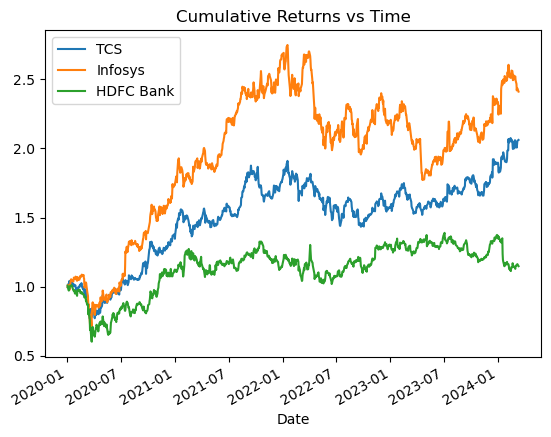

In [60]:
#price_rsl['Cumulative Returns'].plot(label='Reliance',figsize=(15,7))
price_tcs['Cumulative Returns'].plot(label='TCS')
price_infy['Cumulative Returns'].plot(label='Infosys')
price_HDFCBank['Cumulative Returns'].plot(label='HDFC Bank')
plt.title('Cumulative Returns vs Time')
plt.legend()

### Findings
1) Display the last 5 row with prices [OHLC]
2) For multiple data we need to use list of ticker, pass the list to the download & fetch the values
3) Fetching minute level data, mention the time period and intervals
4) Fetching fundamental data of particular stock
5) To obtain balance sheet of particular stock
6) To fetch data for various keys like PB ratio, PE ratio etc....
7) Volumes of each stocks
8) Locating the spike in the volume of particular stock & plotting graph[example: HDFC Bank]
9) To find the total capital traded in the market
10) Volume chart of total capital traded
11) Plotting moving average of particular stock [example: HCL Tech, TCS .....]
12) Correlation & Scatter Matrix between stocks
13) Ploting candle stick patterns of particular stock within certain time period
14) Daily Percentage Change or Volatile Market
15) Plotting the histogram with volatile value
16) Plotting KDE[Kernal Density Estimate] of the stocks for validating the volatile changes
17) Box plot for validating the volatile changes of stocks
18) Compare the volatility of other stocks, create a scatter plot matrix
19) Cumulative Returns
